In [1]:
!pip install fast_ml --upgrade

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import gc
import os
#import fast_ml
# #from fast_ml.utilities import *
# from fast_ml.eda import eda_numerical_variable, eda_categorical_variable
# from fast_ml.missing_data_imputation import MissingDataImputer_Categorical, MissingDataImputer_Numerical
# from fast_ml.feature_engineering import FeatureEngineering_Categorical
# from fast_ml.outlier_treatment import check_outliers, OutlierTreatment
# from fast_ml.eda import eda_numerical_variable, eda_numerical_plots, eda_numerical_plots_with_target 
# from fast_ml.eda import eda_categorical_variable, eda_categorical_plots, eda_categorical_plots_with_target
from sklearn.model_selection import train_test_split

In [23]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
df= pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/fraud/train_sample20_stage1.csv')

In [25]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,50.00,H,18268,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,30.95,W,15343,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,159.95,W,12686,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,107.95,W,11100,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,454.95,W,11157,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
var=['card1']

In [27]:
df['card1'].value_counts()

7919     2034
9500     1996
15885    1503
17188    1488
15066    1114
         ... 
14611       1
10985       1
13098       1
15147       1
2047        1
Name: card1, Length: 7107, dtype: int64

In [28]:
import fast_ml.eda
from fast_ml.eda import numerical_plots_with_target
from fast_ml.eda import categorical_plots_with_rare_and_target,categorical_plots_with_target

**<u> 1. Plot for card1</u>**

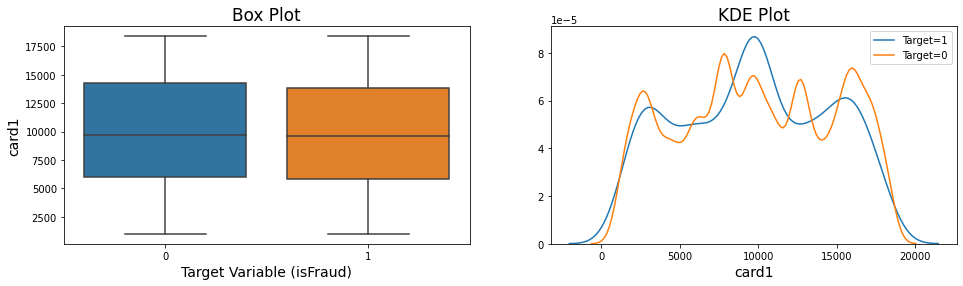

In [29]:
numerical_plots_with_target(df, ['card1'], 'isFraud', model='clf')

KBinsDiscretizer with stratergy 

1. **‘uniform’**: All bins in each sample have identical widths
2.  **‘quantile’**: All bins in each sample have the same number of points
3.  '**Kmeans**'  Values in each bin have the same nearest center of a 1D k-means cluster.




In [30]:
from sklearn.preprocessing import KBinsDiscretizer

In [31]:
df['card1_bins']=df['card1']

In [33]:
var=['card1_bins']

In [34]:
est = KBinsDiscretizer( encode='ordinal', strategy='kmeans')
df[var]=est.fit_transform(df[var])

In [35]:
df['card1_bins'].value_counts()

4.0    18897
1.0    17632
0.0    16685
2.0    15627
3.0    13835
Name: card1_bins, dtype: int64

In [101]:
x=est.bin_edges_.argmin

In [98]:
est.bin_edges_

array([array([4.24000000e-01, 1.84277002e+02, 5.65802214e+02, 1.27515818e+03,
       2.31861702e+03, 6.08523000e+03])], dtype=object)

In [102]:
print ('x')

x




*   **oth Bin**:[1005-4907]
*   **1st BIn**:[4907-8425]
*   **2nd Bin**:[8425-11494]
*   **3rd Bin**:[11494-14758]
*   **4th BIN**:[14758-18390]



In [40]:
sorted_df=df.sort_values(by='card1_bins')

In [42]:
sorted_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card1_bins
41337,3351780,0,9059239,117.00,W,3334,583.0,150.0,visa,226.0,credit,325.0,87.0,2.0,NaN,hotmail.com,NaN,4.0,4.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,3.0,1.0,22.0,2.0,313.0,141.0,0.0,141.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37025,3300125,0,7785499,35.95,W,4167,300.0,150.0,visa,166.0,debit,177.0,87.0,48.0,NaN,gmail.com,NaN,2.0,4.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,3.0,0.0,16.0,2.0,94.0,94.0,93.0,93.0,93.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37020,3216636,0,5438686,42.95,W,1675,174.0,150.0,visa,226.0,debit,330.0,87.0,8.0,NaN,verizon.net,NaN,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,11.0,2.0,166.0,166.0,11.0,166.0,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37018,3415371,0,10816219,44.99,W,4346,268.0,150.0,visa,166.0,debit,512.0,87.0,9.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,21.0,21.0,2.0,20.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37015,3075449,0,1870463,97.00,W,4571,584.0,150.0,mastercard,117.0,debit,325.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,292.0,292.0,14.0,292.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


**<u> 1. Plot for card1_bins</u>**

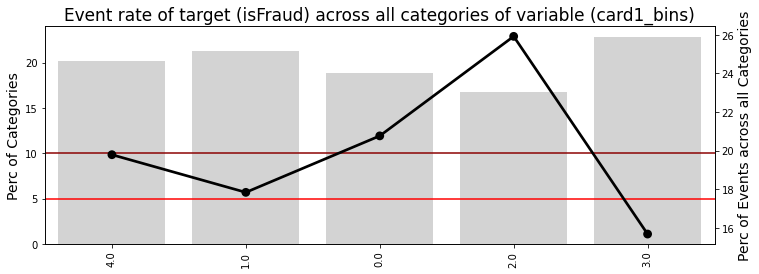

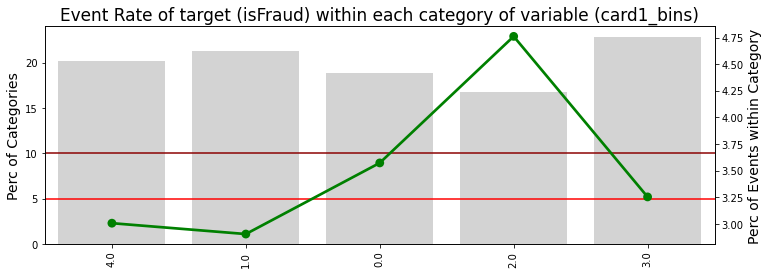

card1_bins,4.0,1.0,0.0,2.0,3.0
count,18897.000000,17632.000000,16685.000000,15627.000000,13835.000000
perc,22.856694,21.326624,20.181189,18.901495,16.733998
isFraud,3.005768,2.903811,3.572071,4.760991,3.252620


In [44]:
categorical_plots_with_target(sorted_df,['card1_bins'],target='isFraud',model='clf')

In [45]:
import seaborn as sns

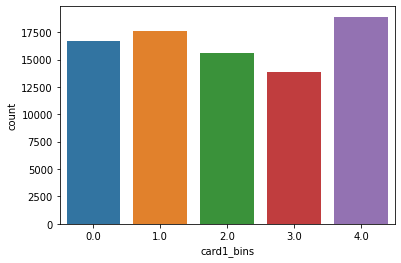

In [46]:
sns.countplot(data=df,x='card1_bins')

New

In [58]:
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
df['TransactionAmt_bins']=df['TransactionAmt']

In [60]:
var=['TransactionAmt_bins']

In [63]:
est = KBinsDiscretizer(encode='ordinal' ,strategy='kmeans')
df[var]=est.fit_transform(df[var])

In [68]:
est.bin_edges_

array([array([4.24000000e-01, 1.84277002e+02, 5.65802214e+02, 1.27515818e+03,
       2.31861702e+03, 6.08523000e+03])], dtype=object)

In [ ]:
plt.scatter(train_sample['TransactionAmt'],train_sample['isFraud'])

In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,0.0,H,4.0,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,0.0,W,4.0,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,0.0,W,3.0,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,0.0,W,2.0,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,1.0,W,2.0,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**quantile stratergy**

In [ ]:
train_sample= pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/fraud/train_sample20_stage1.csv')

In [ ]:
var2=['TransactionAmt','card1']

In [ ]:
est = KBinsDiscretizer( encode='ordinal', strategy='quantile')
train_sample[var2]=est.fit_transform(train_sample[var2])

In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,1.0,H,4.0,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,0.0,W,4.0,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,4.0,W,3.0,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,3.0,W,2.0,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,4.0,W,2.0,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_sample['TransactionAmt'].value_counts()

2.0    17570
4.0    17129
3.0    16895
0.0    15675
1.0    15407
Name: TransactionAmt, dtype: int64

In [ ]:
est.bin_edges_

array([array([4.24000e-01, 3.59500e+01, 5.79500e+01, 1.00000e+02, 1.59950e+02,
       6.08523e+03]),
       array([ 1005.,  4806.,  8131., 11316., 15173., 18390.])],
      dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

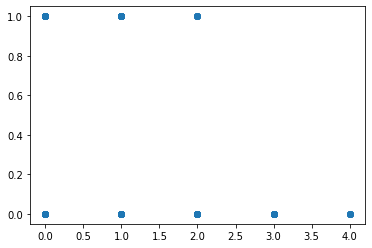

In [ ]:
plt.scatter(train_sample['TransactionAmt'],train_sample['isFraud'])

**normal stratergy**

In [ ]:
train_sample= pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/fraud/train_sample20_stage1.csv')

In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,50.00,H,18268,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,30.95,W,15343,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,159.95,W,12686,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,107.95,W,11100,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,454.95,W,11157,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
var3=['TransactionAmt','card1']
est = KBinsDiscretizer( encode='ordinal', strategy='uniform')
train_sample[var3]=est.fit_transform(train_sample[var3])

In [ ]:
train_sample['TransactionAmt'].value_counts()

0.0    81946
1.0      593
2.0      121
3.0       11
4.0        5
Name: TransactionAmt, dtype: int64

In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,0.0,H,4.0,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,0.0,W,4.0,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,0.0,W,3.0,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,0.0,W,2.0,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,0.0,W,2.0,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
est.get_params

<bound method BaseEstimator.get_params of KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform')>

In [ ]:
est.bin_edges_

array([array([4.2400000e-01, 1.2173852e+03, 2.4343464e+03, 3.6513076e+03,
       4.8682688e+03, 6.0852300e+03]),
       array([ 1005.,  4482.,  7959., 11436., 14913., 18390.])],
      dtype=object)

common


In [ ]:
train_sample= pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/fraud/train_sample20_stage1.csv')

In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,50.00,H,18268,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,30.95,W,15343,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,159.95,W,12686,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,107.95,W,11100,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,454.95,W,11157,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
variables=['TransactionAmt','card1']

In [ ]:
def KBinsDiscretizerr(df, variables):
  param_dict_ = {}
  for var in variables :
    est = KBinsDiscretizer(encode='ordinal',strategy='kmeans')
    df[var]=est.fit_transform(df[var].values.reshape(-1,1))
    #print(s)
    #param_dict_[i] = s.to_dict()
    param_dict_= df[var].unique()
    print(param_dict_)



  

In [ ]:
KBinsDiscretizerr(train_sample,['TransactionAmt'])

[0. 1. 2. 3. 4.]


In [ ]:
train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3096354,0,2150198,0.0,H,18268,583.0,150.0,visa,226.0,credit,272.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,109.875,0.875,...,-5.0,66078.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,139.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 8.1,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
1,3228215,0,5699227,0.0,W,15343,575.0,150.0,visa,226.0,debit,512.0,87.0,1.0,NaN,NaN,NaN,4.0,3.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3370619,0,9601989,0.0,W,12686,215.0,150.0,visa,226.0,debit,387.0,87.0,6.0,NaN,gmail.com,NaN,109.0,105.0,0.0,0.0,121.0,85.0,0.0,0.0,77.0,0.0,90.0,1.0,534.0,87.0,592.0,592.0,20.0,507.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3296148,0,7686984,0.0,W,11100,302.0,150.0,visa,226.0,debit,428.0,87.0,1.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,2.0,147.0,147.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3563423,0,15335196,1.0,W,11157,215.0,150.0,visa,226.0,debit,433.0,87.0,15.0,NaN,me.com,NaN,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,140.0,140.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
par_dict=[]
for var in var1:
   np.percentile(train_sample['var'],[0,10,20,30,40,50,60,70,80,90.100])


NameError: ignored

In [ ]:
bins =np.percentile(train_sample['dist1'],[0,10,20,30,40,50,60,70,80,90,100])

In [ ]:
labels =[1,2,3,4,5,6,7,8,9,10]

In [ ]:
pd.cut(train_sample['dist1'], bins,labels=labels, duplicates='drop')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/tile.py:254: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins.astype("float64")) < 0).any():


ValueError: ignored

In [ ]:
bins =np.percentile(train_sample['dist1'],[0,10,20,30,40,50,60,70,80,90,100])
labels =[1,2,3,4,5,6,7,8,9,10]
train_sample['binned'] = pd.cut(train_sample['dist1'], bins,labels=labels)
print (train_sample['binned'])

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/tile.py:254: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins.astype("float64")) < 0).any():


ValueError: ignored

In [ ]:
train_sample[var]=pd.cut(x = train_sample[var],bins = np.percentile[0,10,20,30,40,50,60,70,80,90,100],labels = [1,2,3,4,5,6,7,8,9,10])


TypeError: ignored

In [ ]:
df =train_sample['dist1']

In [ ]:
bin[]
for i in train_sample['dist1']:
    for j in train_sample['dist1']:
        if i=j:
            if train_sample[i].index.tolist()=train_sample[j].index.tolist():
                

In [ ]:
import numpy as np
import pandas

df =train_sample

# Bin the data frame by "a" with 10 bins...
bins = np.percentile(df['dist1'],[0,10,20,30,40,50,60,70,80,90,100])
groups = df.groupby(np.digitize(df['dist1'], bins))
print(df['dist1'])
# Get the mean of each bin:
# print(groups.mean()) # Also could do "groups.aggregate(np.mean)"

# # Similarly, the median:
# print(groups.median())

# # Apply some arbitrary function to aggregate binned data
# print(groups.aggregate(lambda x: np.mean(x[x > 0.5])))

0         NaN
1         1.0
2         6.0
3         1.0
4        15.0
         ... 
82671     0.0
82672     NaN
82673    10.0
82674     NaN
82675     NaN
Name: dist1, Length: 82676, dtype: float64


In [ ]:
!pip install MDLP

In [ ]:
from MDLP import MDLP_Discretizer

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from MDLP import MDLP_Discretizer


ModuleNotFoundError: ignored